# Session 1. Intro to Python and Jupyter 

## Jupyter 

The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.

[jupyter.org](https://jupyter.org)

### Jupyter notebook: some shortcuts

[Source](https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330)

Basic shortcuts
* Enter edit mode
* Esc command mode
* Shift + Enter run the current cell, select below
* Ctrl/Command + Enter run selected cells
* Alt + Enter run the current cell, insert below
* Ctrl/Command + S save and checkpoint

Command mode shortcuts
* Enter take you into edit mode
* Up select cell above
* Down select cell below
* Shift + Up extend selected cells above
* Shift + Down extend selected cells below
* A insert cell above
* B insert cell below
* X cut selected cells
* C copy selected cells
* V paste cells below
* Shift + V paste cells above
* D, D (press the key twice) delete selected cells
* Z undo cell deletion
* S Save and Checkpoint
* Y change the cell type to Code
* M change the cell type to Markdown

## Markdown basics

[Basic syntax](https://www.markdownguide.org/basic-syntax/)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
##### Heading 5

normal text

**bold**

*italics*

~strikethrough~

# Python

Python is a high-level, general purpose, interpreted, dynamic programming language. It is very popular in data science and machine learning.

We will be using Python in this course, and in other courses in your Masters. Knowing how to use Python for data analytics and machine learning will give you a head start and will make learning the analytics technicalities way easier.

## Why Python?

[StackOverflow Survey 2022](https://survey.stackoverflow.co/2022/#technology-most-popular-technologies)

## What can you do with Python?

### You can print stuff in the screen

In [4]:
print("Hello sdadasWorld!")

Hello sdadasWorld!


In [2]:
print("Hi Class!")

Hi Class!


### You can input data

In [5]:
input("What's your name?")

What's your name?lucas is noob


'lucas is noob'

### You can save your inputs as variables in the memory of your computer

In [6]:
name = input("What's your name?")

### Comments can be added by a preceding #:

Comments will be invisible to the python interpreter but will be very useful for your future self and your colleagues. Code should be coded in a way that's easy to understand for humans, because the computer will always understand it.

In [6]:
# let's print all the vowels in English

for letter in "abcdefghijklmnopqrstuvwxyz":  # loop through all the letters in the abc
    
    if letter in "lucas":  # only print noob
        
        print(letter)  # nice :D

a
c
l
s
u


### You can encapsulate several commands in a single instruction -- Functions!

In [2]:
def questions():
    name = input("What's your name?")
    age = input("What's your age?")
    return name, age

### You can run your own functions

In [3]:
questions()

What's your name?test
What's your age?24


('test', '24')

In [13]:
def best_professor():
    name, age = questions()
    best_prof = f"The best professor is {name}, he looks way younger than {age}!"
    return best_prof

In [14]:
best_professor()

What's your name?fin de semana
What's your age?0


'The best professor is fin de semana, he looks way younger than 0!'

### You can count numbers

In [12]:
number = 17

list(range(1, number+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### You can calculate stuff

In [13]:
4 + 3

7

### You can create functions to solve problems

This function receives a number and returns True if the number is prime, and false otherwise.

In [ ]:
def is_prime(number):
    
    # set a list to store all the pure dividers
    dividers = []
    
    # loop through all the numbers between our input and 1
    for n in range(1, number+1):
        
        # check if division is exact by using the modulo/remainder
        if number % n == 0: # if remainder is zero it's an exact division
            dividers.append(n)  # we save the number as a divider if exact division
            
    # definition of prime: only exact division by 1 and itself
    if dividers == [1, number]:
        prime = True
    else:
        prime = False
        
    # return True/False and the dividers
    return prime, dividers



In [ ]:
is_prime(147436363463)

### You can build your own calculators (yay!)

$$ \frac{2 + 0.14}{(4 \cdot 3)^3} $$

In [16]:
(2 + 0.14) / (4 * 3) ** 3

0.001238425925925926

### You can visualize data and build nice charts

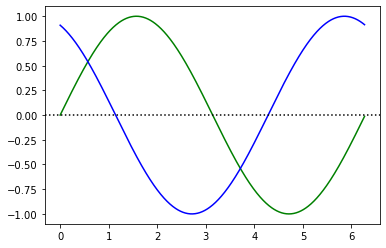

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 6.28, 0.01) # create data between 0 and 2Pi
y = np.sin(x) # get the sine of each value 
y2 = np.sin(x + 2) # get the sine of each value + 0.5

plt.plot(x, y, color="green")
plt.plot(x, y2, color="blue")
plt.axhline(0, linestyle=":", color="black")

### You can access cool APIs and get data from the outside world: ISS!

In [18]:
import requests
import json

req = requests.get("http://api.open-notify.org/iss-now.json")

req_json = req.json()

req_json

{'message': 'success',
 'timestamp': 1664385805,
 'iss_position': {'latitude': '2.7499', 'longitude': '-82.5259'}}

#### Let's take two measurements, calculate the time in between, and find the speed of the ISS

In [19]:
import time

req1 = requests.get("http://api.open-notify.org/iss-now.json")
req1_json = req1.json()

time.sleep(5)  # this makes the python interpreter wait for 5 seconds before running the next line

req2 = requests.get("http://api.open-notify.org/iss-now.json")
req2_json = req2.json()

Now we get the individual values for longitude and latitude for each request

In [20]:
lat1 = req1_json["iss_position"]["latitude"]
lon1 = req1_json["iss_position"]["longitude"]
lat2 = req2_json["iss_position"]["latitude"]
lon2 = req2_json["iss_position"]["longitude"]

When calculating distances in a sphere (Like the Earth) we can't use the Euclidean distance:

$$ d_{Euclidean} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

We need to take into account the Earth's curvature and the radius: Haversine distance

In [21]:
# https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
# https://en.wikipedia.org/wiki/Haversine_formula

from math import radians, cos, sin, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):

    R = 6372.8  # Radius of earth: for miles use 3959.87433 mi, for kilometers use 6372.8 km

    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))

    return R * c

Errors found in this formula will account for participation.

Now we can use this function to calculate distance in km.

In [22]:
haversine_distance(lon1, lat1, lon2, lat2)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

What happened?

In [ ]:
lat1 = float(req1_json["iss_position"]["latitude"])
lon1 = float(req1_json["iss_position"]["longitude"])
lat2 = float(req2_json["iss_position"]["latitude"])
lon2 = float(req2_json["iss_position"]["longitude"])

In [ ]:
distance = haversine_distance(lon1, lat1, lon2, lat2)

distance

In [ ]:
speed_kps = distance / 5  # km/s
speed_kph = speed_kps * 3600 # km/s * 3600s/h

print(f"The ISS is flying at a speed of {speed_kps} km/s, or {speed_kph}")

In [1]:
for i in range(8):
    print(i)
    

0
1
2
3
4
5
6
7


In [4]:
for i in range(2,8):
    print(i)

2
3
4
5
6
7


In [8]:
i=0
while i<=7:
    print(i)
    i=i+1

0
1
2
3
4
5
6
7


In [11]:
for i in range(7,-1,-1):
    print(i)

7
6
5
4
3
2
1
0


In [15]:

print("😋")
for i in range(7,3,-1):
    print("the value is ",i)

😋
the value is  7
the value is  6
the value is  5
the value is  4


In [27]:
csv= " sadadada@asdadad.com, lkjhkjhjk@kjhjh.com, oiuiouoi,@kjhkhk.com"
x = csv.split()
print(x)
lentre=[]
gentre=[]
for i in x:
    entre = i.split("@")
    lentre.append(entre)
lentre    


['sadadada@asdadad.com,', 'lkjhkjhjk@kjhjh.com,', 'oiuiouoi,@kjhkhk.com']


AttributeError: 'list' object has no attribute 'split'